Right_eye


c:\Users\user\.conda\envs\han\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Normal
87% is Normal eye


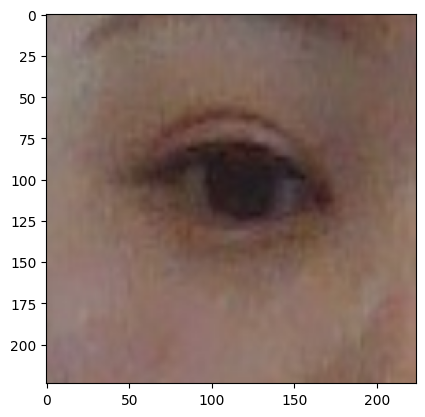

Left_eye
Normal
86% is Normal eye


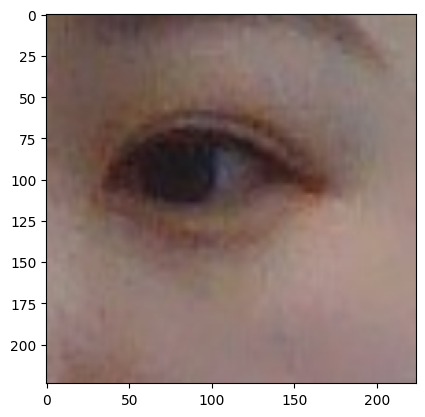

In [1]:
import cv2
import cvzone
from cvzone.FaceMeshModule import FaceMeshDetector
import mediapipe as mp
import datetime
from glob import glob
import cataract_predict as cp

# 얼굴 찾고, 특징 표시
mp_face_detection = mp.solutions.face_detection #얼굴 검출
mp_drawing = mp.solutions.drawing_utils # 얼굴 특징 표시

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)
# model_selection=0 -> 2m 내, model_selection=1 -> 5m 내
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.7) as face_detection:
      while True:
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1000)
        success, image = cap.read()

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.detections:
            for detection in results.detections:

                keypoints=detection.location_data.relative_keypoints
                right_eye= keypoints[0] # 왼쪽눈
                left_eye=keypoints[1]  # 오른쪽눈

                h, w, _=image.shape 
                right = image[int(right_eye.y*h-40):int(right_eye.y*h+40), int(right_eye.x*w-60):int(right_eye.x*w+40)]
                left = image[int(left_eye.y*h-40):int(left_eye.y*h+40), int(left_eye.x*w-40):int(left_eye.x*w+60)]

        now = datetime.datetime.now().strftime("%d_%H-%M-%S")
        right_name = './image_/'+'right_image' + str(now) + ".jpg"
        left_name = './image_/'+'left_image' + str(now) + ".jpg"
        mp_drawing = mp.solutions.drawing_utils
        mp_hands = mp.solutions.hands
        
        
        with mp_hands.Hands(
            max_num_hands=1,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5) as hands:
            image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
            results = hands.process(image)
    
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    finger1 = int(hand_landmarks.landmark[20].y * 100 )
                    finger2 = int(hand_landmarks.landmark[8].y * 100 )
                    hand = int(hand_landmarks.landmark[0].y * 100 )
                    dist = abs(finger1 - hand)
                    dist2 = abs(finger2 - hand)
                    cv2.putText(
                            image, text='Smile Please~', org=(10, 30),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                            color=255, thickness=3)
                    
                    if int(dist/2) < 15 :
                        print("Right_eye")
                        cv2.imwrite(right_name, right)
                        cp.image_test(right_name)
                        print("Left_eye")
                        cv2.imwrite(left_name, left)
                        cp.image_test(left_name)

        cv2.imshow("Image", image)
        key = cv2.waitKey(1)
        
        if key == ord('q'):
            break

cv2.destroyAllWindows()
